In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import copy


In [2]:

def otsu(img):

    min_cost = float('inf')
    threshold = 0

    for i in range(1,256):
        v0 = np.var(img[img < i], ddof = 1)
        w0 = len(img[img < i])
        v1 = np.var(img[img >= i], ddof = 1)
        w1 = len(img[img >= i])

        cost = w0*v0 + w1*v1
        if(cost < min_cost):
            min_cost = cost
            threshold = i

    return threshold

In [8]:
def select_foreground(img, s = 0):
    if(s == 0):
        m,n = img.shape
        
        m0 = int(0.15*m)
        n0 = int(0.15*n)
        c0 = 0
        c1 = 0
        for i in range(m//2 - m0, m//2 + m0):
            for j in range(n//2 - n0, n//2 + n0):
                if(img[i,j] == 0):
                    c0 = c0 + 1
                else:
                    c1 = c1 + 1
        if(c0 > c1):
            return 0
        else :
            return 1
    else : 
        
        m,n = img.shape
        
        m0 = 10
        n0 = 10
        c0 = 0
        c1 = 0
        for i in range(m):
            for j in range(n):
                if (i < m0): 
                    if(img[i,j] == 0):
                        c0 = c0 + 1
                    else:
                        c1 = c1 + 1
                    
                elif (i > m-m0): 
                    if(img[i,j] == 0):
                        c0 = c0 + 1
                    else:
                        c1 = c1 + 1
                elif (j < n0): 
                    if(img[i,j] == 0):
                        c0 = c0 + 1
                    else:
                        c1 = c1 + 1
                elif (j > n-n0): 
                    if(img[i,j] == 0):
                        c0 = c0 + 1
                    else:
                        c1 = c1 + 1
                
        if(c0 > c1):
            return 0
        else :
            return 1
        
        

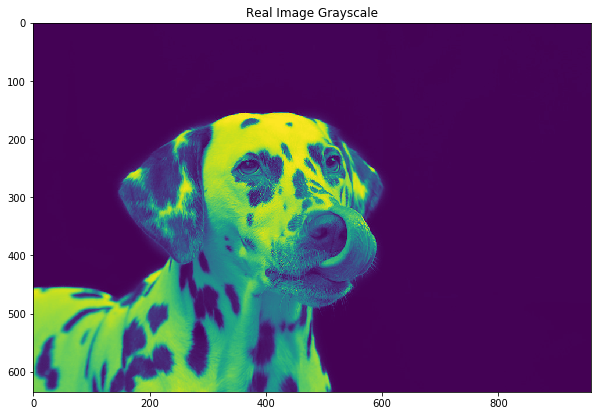

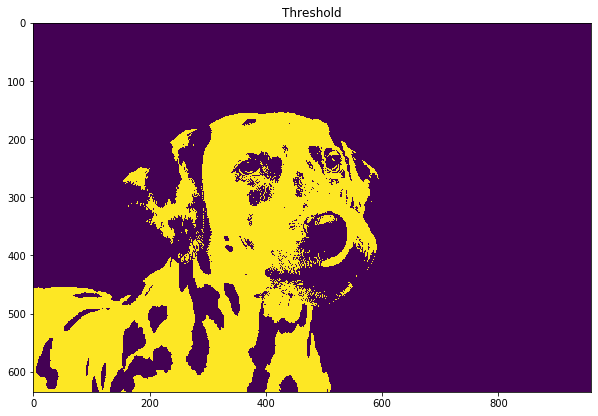

Otsu Threshold :  93


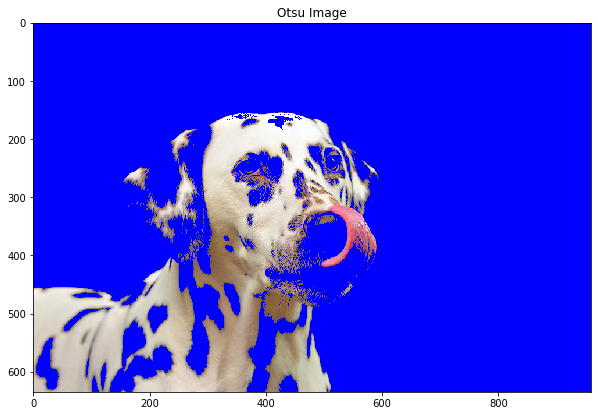

In [9]:
img = cv2.imread("dog-1020790_960_720.jpg", 0)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.title("Real Image Grayscale")
plt.show()

img.astype(int)
thres = otsu(img)
img[img<thres] = 0
img[img >= thres] = 1
fore = select_foreground(img,0)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.title("Threshold")
plt.show()

print("Otsu Threshold : ",thres)
img2 = cv2.imread("dog-1020790_960_720.jpg")
img = cv2.imread("dog-1020790_960_720.jpg", 2)
if(fore == 1):
    img[img <= thres]= -1
else :
    img[img >= thres]= -1

    
B = img2[:,:,0]
G = img2[:,:,1]
R = img2[:,:,2]

m,n = R.shape
for i in range(m):
    for j in range(n):
        if(img[i,j] == 255):
            B[i,j] = 255
            R[i,j] = 0
            G[i,j] = 0
final_image =  np.dstack((R,G,B))
plt.figure(figsize=(10,10))
plt.imshow(final_image)
plt.title("Otsu Image")
plt.show()


